b'batch_label'
b'labels'
b'data'
b'filenames'
b'testing batch 1 of 1'
(10000, 10) (10000, 3072)


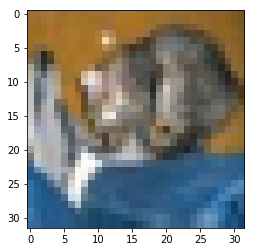

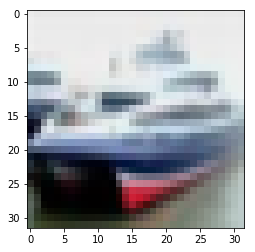

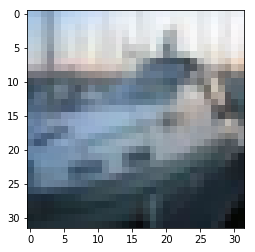

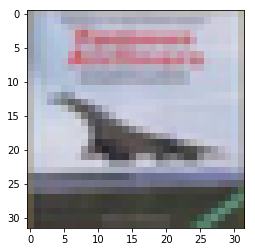

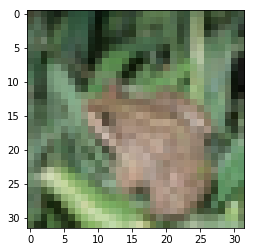

ValueError: Error when checking target: expected dense_5 to have shape (1,) but got array with shape (10,)

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def unpack_im(im_vector):
    im = np.zeros([32,32,3])
    for i in range(3):
        im[:,:,i] = im_vector[i*1024:i*1024+1024].reshape([32,32])
    im = im.astype('uint8')
    return im

def val2bin(labels):
    bin = np.zeros([len(labels),10])
    for i in range(len(labels)):
        bin[i, labels[i]]=1
    return bin.astype('uint')

dict = unpickle('./test_batch')
for key in dict:
    print(key)
print(dict[b'batch_label'])
labels = np.array(dict[b'labels'])
labels = val2bin(labels)
data = np.array(dict[b'data'])
print(labels.shape, data.shape)

#demonstrate images
for i in range(5):
    im = unpack_im(data[i,:])
    plt.imshow(im), plt.show()
    
# divide to train and test
train_percent = 0.7
train_num = int(len(data)*train_percent)
x_train = data[:train_num]
y_train = labels[:train_num]
x_test = data[train_num:]
y_test = labels[train_num:]


    
#train the model
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


In [7]:
print(labels[-3,])

[0 0 0 0 0 1 0 0 0 0]
